In [17]:
# Read in medical_clean.csv and save to df

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('j/medical_clean.csv')


In [25]:
df_new = df[['Initial_days', 'ReAdmis']]
df_new

,Initial_days,ReAdmis
0,10.585770,No
1,15.129562,No
2,4.772177,No
3,1.714879,No
4,1.254807,No
...,...,...
9995,51.561220,No
9996,68.668240,Yes
9997,70.154180,Yes
9998,63.356900,Yes


In [27]:
df_new.loc[:, 'ReAdmis'] = df_new['ReAdmis'].replace({'Yes': 1, 'No': 0})


/var/folders/m6/1s5cgbkd0cbc2rysvmp26f7m0000gn/T/ipykernel_40180/3554021984.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new.loc[:, 'ReAdmis'] = df_new['ReAdmis'].replace({'Yes': 1, 'No': 0})


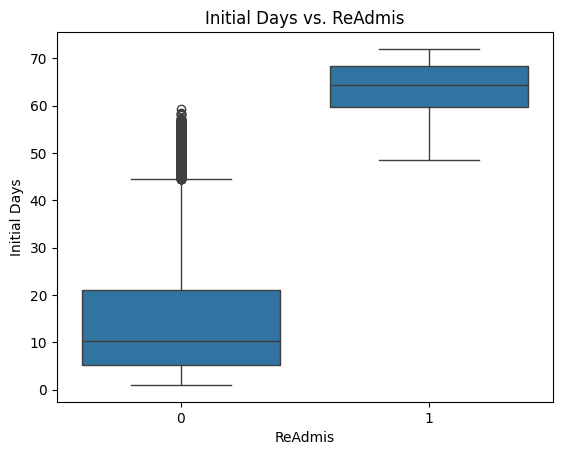

In [30]:
df_new

plot = sns.boxplot(x='ReAdmis', y='Initial_days', data=df_new)
plot.set_title('Initial Days vs. ReAdmis')
plot.set_xlabel('ReAdmis')
plot.set_ylabel('Initial Days')
plt.show()


In [ ]:

# remove the outliers based on the `ReAdmis` column



Mean Squared Error: 196.46925714976894


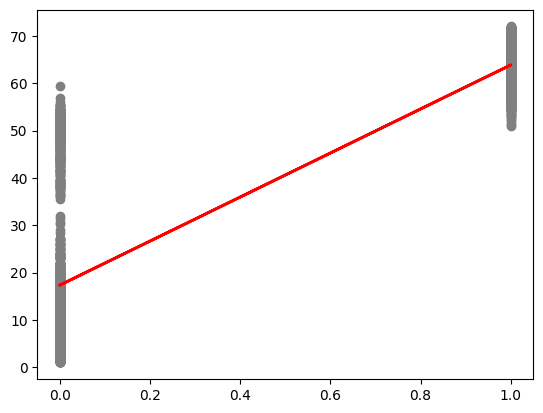

In [31]:
# create a simple linear regression model to predict the number of initial days spent in the hospital based on whether or not the patient was readmitted to the hospital.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df_new['ReAdmis'].values.reshape(-1,1)
y = df_new['Initial_days'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

plt.scatter(X_test, y_test, color='gray')

plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.show()

